In [1]:
import numpy as np 
import pandas as pd
from scipy import misc
import imageio
import matplotlib.pyplot as plt
from os import listdir
import random

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
import keras
from keras import backend as K
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

#creating figures
import matplotlib.pyplot as plt
import seaborn as sns

#resizing
import cv2
import warnings

Using TensorFlow backend.


In [2]:
# resize image and turn pixel values between 0 and 1
img_shape = 50

# cell labels are 1 if infected, 0 if uninfected.
cell_labels = []

# cells 
cell_images = []

#first six infected and unfected cells for visualization only
infected_cells = []
uninfected_cells = []

#listdir("../input/cell_images/cell_images/")
base_path = "cell_images/cell_images/"

#get infected cells
infected_path = base_path +'Parasitized/'
for file in listdir(infected_path):
    if file.endswith('.png'):
        file_path = infected_path + file
        image = imageio.imread(file_path)
        image = cv2.resize(image,(img_shape,img_shape)).astype('float32')/255.0
        infected_cells.append(image)
        cell_images.append(image)
        cell_labels.append(1)

            
#get uninfected cells
uninfected_path = base_path +'Uninfected/'
for file in listdir(uninfected_path):
    if file.endswith('.png'):
        file_path = uninfected_path + file
        image = imageio.imread(file_path) 
        image = cv2.resize(image,(img_shape,img_shape)).astype('float32')/255.0   
        uninfected_cells.append(image)
        cell_images.append(image)
        cell_labels.append(0)

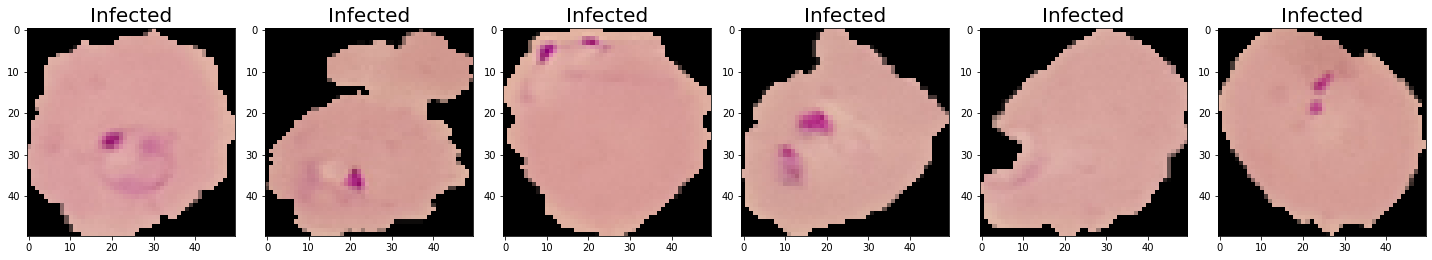

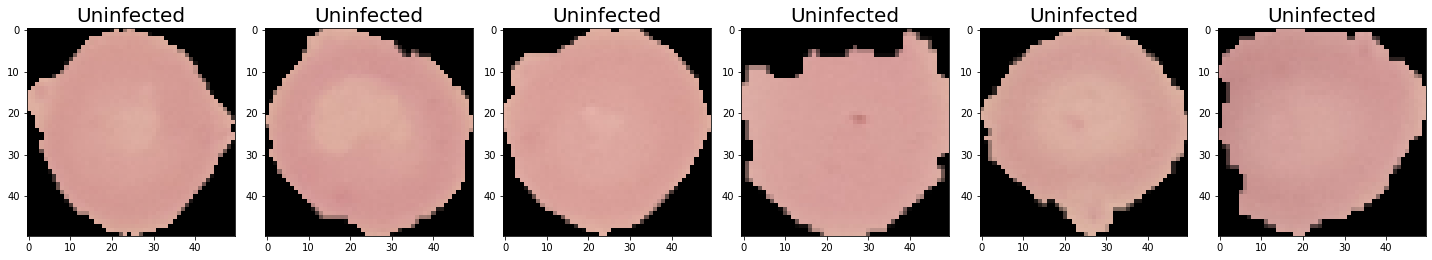

In [3]:
# visualize cells
def ShowFirstSix(images_arr,title):

    fig, axes = plt.subplots(1, 6, figsize=(20,20))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()
ShowFirstSix(infected_cells,'Infected')
ShowFirstSix(uninfected_cells,'Uninfected')

In [4]:
# randomly shuffle cell image list and their labels
def reorder(old_list,order):
    new_list=[]
    for i in order:
        new_list.append(old_list[i])
    return new_list

np.random.seed(seed=42)
indices=np.arange(len(cell_labels))
indices=indices.tolist()
cell_labels=reorder(cell_labels,indices)
cell_images=reorder(cell_images,indices)

#we change it to arrays
image_array=np.array(cell_images)
label_array=np.array(cell_labels)

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(image_array,label_array,test_size=0.20,random_state=42)

In [6]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=len(ytest),random_state=42)

In [7]:
print('size of train dataset {}'.format((xtrain.shape[0])))
print('size of test dataset {}'.format((xtest.shape[0])))
print('size of validation dataset {}'.format((xval.shape[0])))

size of train dataset 16534
size of test dataset 5512
size of validation dataset 5512


In [8]:
#creating a model

In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow(xtrain, ytrain, batch_size = 128, shuffle = False)
val_generator = val_datagen.flow(xtest, ytest, batch_size = 128, shuffle = False)

In [10]:
def create_model():
    model=Sequential()
    
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=(50,50,3),padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    
    return model

In [12]:
model=create_model()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator, epochs=25,validation_data=val_generator,verbose=1)
model.summary()

Epoch 1/25
259/259 [==============================] - 234s 903ms/step - loss: 0.7210 - accuracy: 0.6022 - val_loss: 0.6749 - val_accuracy: 0.5074
Epoch 2/25
259/259 [==============================] - 180s 696ms/step - loss: 0.6253 - accuracy: 0.6707 - val_loss: 1.1789 - val_accuracy: 0.4926
Epoch 3/25
259/259 [==============================] - 182s 702ms/step - loss: 0.4187 - accuracy: 0.8274 - val_loss: 0.4791 - val_accuracy: 0.9316
Epoch 4/25
259/259 [==============================] - 179s 691ms/step - loss: 0.3059 - accuracy: 0.8905 - val_loss: 0.2835 - val_accuracy: 0.9452
Epoch 5/25
259/259 [==============================] - 180s 695ms/step - loss: 0.2716 - accuracy: 0.9077 - val_loss: 0.3383 - val_accuracy: 0.9414
Epoch 6/25
259/259 [==============================] - 184s 710ms/step - loss: 0.2569 - accuracy: 0.9123 - val_loss: 0.2421 - val_accuracy: 0.9559
Epoch 7/25
259/259 [==============================] - 182s 703ms/step - loss: 0.2538 - accuracy: 0.9152 - val_loss: 2.1425 -

In [13]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


<function matplotlib.pyplot.show(*args, **kw)>

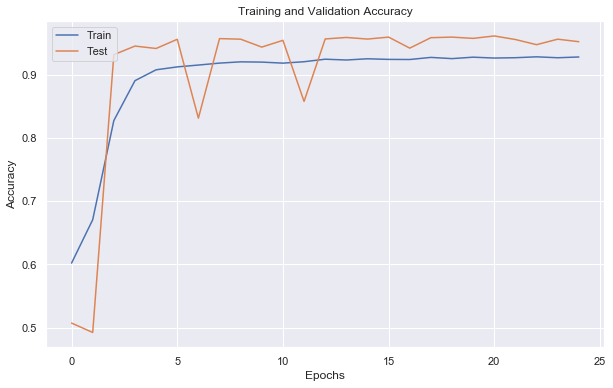

In [14]:
plt.figure(figsize=(10,6))
sns.set()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show

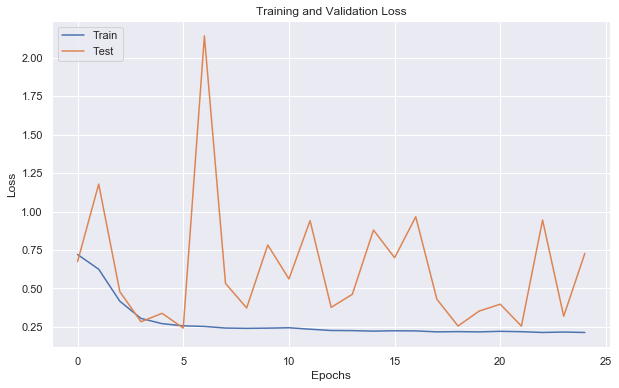

In [15]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()